In [1]:
import pandas as pd

In [2]:
music_df = pd.read_csv("music_clean.csv")

In [3]:
music_df

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
1,37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
2,37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
3,36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
4,35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


## Creating dummy variables


Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.   
Now you will create a new DataFrame containing the original columns of music_df plus dummy variables from the "genre" column.

In [4]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 13)


## Regression with categorical features


Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value—"popularity".

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [6]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

In [7]:
# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 9.998909565816527
Standard Deviation of the target array: 14.02156909907019


Great work! An average RMSE of approximately 8.24 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

## Dropping missing data


Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

Print the number of missing values for each column in the music_df dataset, sorted in ascending order.

In [8]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In the above dataset you don't have any null value, but in the exercise eventhough the dataset has the same name it has null values

Remove values for all columns with 50 or fewer missing values.

In [9]:
# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

Convert music_df["genre"] to values of 1 if the row contains "Rock", otherwise change the value to 0.

In [10]:
# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 13)


The dataset in the exercise has gone from 1000 observations down to 892, but it is now in the correct format for binary classification and the remaining missing values can be imputed as part of a pipeline.

## Pipeline for song genre prediction: I

Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified music_df dataset that you created in the previous exercise has been preloaded for you, along with KNeighborsClassifier and train_test_split.

In [11]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [12]:
# Instantiate an imputer
imputer = SimpleImputer()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

In [14]:
# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

## Pipeline for song genre prediction: II

Having set up the steps of the pipeline in the previous exercise, you will now use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [16]:
music_df

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,0
1,37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,0
2,37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,0
3,36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,0
4,35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


In [17]:
# To drop the column in the 0th index
music_df = music_df.drop(music_df.columns[[0]],axis=1)

In [18]:
music_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,0
1,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,0
2,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,0
3,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,0
4,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


## Pipeline for song genre prediction: II


In [19]:
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

NameError: name 'imp_mean' is not defined

## Centering and scaling for regression


Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness.

In [22]:
from sklearn.linear_model import Lasso

In [23]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

Create the steps for the pipeline object, a StandardScaler object called "scaler", and a lasso model called "lasso" with alpha set to 0.5.

In [24]:
# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

Instantiate a pipeline with steps to scale and build a lasso regression model.

In [25]:
# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.5))])

In [26]:
# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

1.0


The answer I got in the exercise is 0.61935

The model may have only produced an R-squared of 0.619, but without scaling this exact model would have only produced a score of 0.35, which proves just how powerful scaling can be!

## Centering and scaling for classification


Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the music_df dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter C. The target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

Build the steps for the pipeline: a StandardScaler() object named "scaler", and a logistic regression model named "logreg".

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

Create the parameters, searching 20 equally spaced float values ranging from 0.001 to 1.0 for the logistic regression model's C hyperparameter within the pipeline.

In [30]:
# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)


Instantiate the grid search object.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

Fit the grid search object to the training data.

In [35]:
# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1554, in fit
    raise ValueError(
ValueError: This solver needs

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

Using a pipeline shows that a logistic regression model with "C" set to approximately 0.1 produces a model with 0.8425 accuracy!

## Visualizing regression model performance


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

In [46]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

Write a for loop using model as the iterator, and model.values() as the iterable.   
Perform cross-validation on the training features and the training target array using the model, setting cv equal to the KFold object.   
Append the model's cross-validation scores to the results list.       

In [47]:
# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, toleranc

Create a box plot displaying the results, with the x-axis labels as the names of the models.

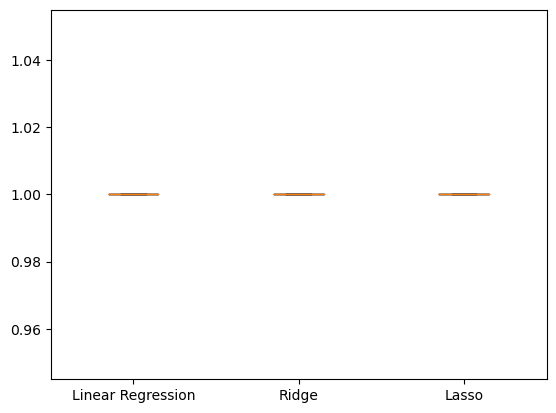

In [48]:
# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.

## Predicting on the test set


In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

In [49]:
from sklearn.metrics import mean_squared_error

Import mean_squared_error.   
Fit the model to the scaled training features and the training labels.   
Make predictions using the scaled test features.   
Calculate RMSE by passing the test set labels and the predicted labels.  
 

###### Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  ######  Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  ######  Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  ######  Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

<script.py> output:   
    Linear Regression Test Set RMSE: 0.1198885150594757   
    Ridge Test Set RMSE: 0.11987066103299669   

The linear regression model just edges the best performance, although the difference is a RMSE of 0.00001 for popularity! Now let's look at classification model selection.

## Visualizing classification model performance


In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

* Create a dictionary of "Logistic Regression", "KNN", and "Decision Tree Classifier", setting the dictionary's values to a call of each model.   
* Loop through the values in models.   
* Instantiate a KFold object to perform 6 splits, setting shuffle to True and random_state to 12.   
* Perform cross-validation using the model, the scaled training features, the target training set, and setting cv equal to kf.    

###### Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

###### Loop through the models' values
for model in models.values():
  
  ###### Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  ###### Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

## Pipeline for predicting song popularity


For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

* Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.   
* Create a pipeline object, and pass the steps variable.   
* Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.   
* Print the best parameters and compute and print the test set accuracy score for the grid search object.

###### Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

###### Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

###### Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

###### Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Excellent - you've selected a model, built a preprocessing pipeline, and performed hyperparameter tuning to create a model that is 82% accurate in predicting song genres!